#Regression Analysis



#Algoritma yang digunakan:

##Linear Regression

##Elastic Net
Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

##Bayesian Ridge
Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

##Decision Tree Regression
The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.
![Decision Tree Regressor](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

##Random Forest Regression
Random Forest builds decision trees on different samples and takes their average in case of regression.

##XGBoost Regression
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

##Support Vector Regression
Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.


In [40]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,18)})

# tambahan
import plotly.express as px

# Preprocess
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# Tuning
from sklearn.model_selection import validation_curve, LeaveOneOut, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, SelectFromModel

# models
from sklearn.linear_model import Perceptron, LinearRegression, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR


##Data Import & Understanding

In [16]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",1000) 

#read the data
data_url = 'https://raw.githubusercontent.com/mihoku/PJJ-Data-Analytics-Python/main/Hari%207/train_data.csv'
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 197 entries, index to SalePrice
dtypes: float64(11), int64(186)
memory usage: 1.5 MB


In [18]:
#describe the data
description = data.describe().T
description['range'] = description['max']-description['min']
description

,count,mean,std,min,25%,50%,75%,max,range
index,1000.0,1225.789000,704.366087,0.0,616.25,1239.5,1843.75,2410.000000,2410.000000
1stFlrSF,1000.0,1132.572000,367.024808,334.0,867.75,1064.0,1358.00,2726.000000,2392.000000
2ndFlrSF,1000.0,332.943000,418.280947,0.0,0.00,0.0,702.00,1818.000000,1818.000000
3SsnPorch,1000.0,3.581000,31.078341,0.0,0.00,0.0,0.00,508.000000,508.000000
Age,1000.0,38.440000,29.529551,0.0,10.00,37.0,55.00,128.000000,128.000000
BsmtFinSF1,1000.0,437.018000,416.685880,0.0,0.00,384.0,722.50,2257.000000,2257.000000
BsmtFinSF2,1000.0,56.953000,186.810468,0.0,0.00,0.0,0.00,1526.000000,1526.000000
BsmtUnfSF,1000.0,520.761000,421.356261,0.0,204.00,423.5,768.25,2153.000000,2153.000000
EnclosedPorch,1000.0,23.990000,63.045227,0.0,0.00,0.0,0.00,584.000000,584.000000
GarageArea,1000.0,461.411000,204.327477,0.0,317.75,471.0,576.00,1356.000000,1356.000000


In [32]:
#generate column name
columns = list(description.index)
#remove target variable from column name list
columns.remove('SalePrice')
#remove other irrelevant columns
columns.remove('index')
print(columns)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Age', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'RemodAge', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', '2ndFlrSFZero', '3SsnPorchZero', 'Alley_Missing', 'Alley_Pave', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtCond_Gd', 'BsmtCond_Missing', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Missing', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinSF1Zero', 'BsmtFinSF2Zero', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Missing', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_LwQ', 'BsmtFinType2_Missing', 'BsmtFinType2_Other', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Missing', 'BsmtQual_TA', 

In [33]:
X_train = data[columns]
Y_train = data[['SalePrice']]

#Model Selection

Untuk pemilihan model, digunakan KFold yang akan menguji performa masing-masing algoritma. KFold cross validation akan membagi train dataset dan test dataset menjadi beberapa sample group (biasa disebut fold) dengan ukuran proporsi data yang sama lalu dilakukan iterasi untuk mentrain model dan menilai performa model hasil training. Setiap iterasi training, digunakan dataset train dan validasi yang berbeda sehingga memberikan indikasi yang lebih baik atas kemampuan model dalam bekerja pada data yang baru.

In [37]:
#initiate models and setting kfold cross validation

linreg = LinearRegression()
bayes_ridge = BayesianRidge()
elastic_net = ElasticNet()
dtree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgb = XGBRegressor()
svr = SVR()

register_model = [
                  ('LR',linreg),
                  ('BR',bayes_ridge),
                  ('EN',elastic_net),
                  ('DT',dtree),
                  ('RF',random_forest),
                  ('XGB',xgb),
                  ('SVR',svr)
]
folds = KFold(n_splits = 15, shuffle = True, random_state = 100)

In [41]:
def model_selection(x_train,y_train,scoring,models,cv):
  data = {}
  for i in models:
    score = cross_validate(i[1],x_train,y_train,scoring=scoring,cv=cv,return_train_score=True)
    data[i[0]+' Train'] = score['train_score']
    data[i[0]+' Test'] = score['test_score']
  score_df = pd.DataFrame(data=data)
  plot = sns.boxplot(data = score_df, linewidth=2.5)
  return score_df.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[17:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LR Train    -2.127322e+08
LR Test     -3.868591e+08
BR Train    -2.381080e+08
BR Test     -3.852902e+08
EN Train    -5.957447e+08
EN Test     -7.008319e+08
DT Train    -7.999798e+03
DT Test     -1.349631e+09
RF Train    -8.287847e+07
RF Test     -6.103756e+08
XGB Train   -1.359834e+08
XGB Test    -4.668839e+08
SVR Train   -5.288072e+09
SVR Test    -5.311410e+09
dtype: float64

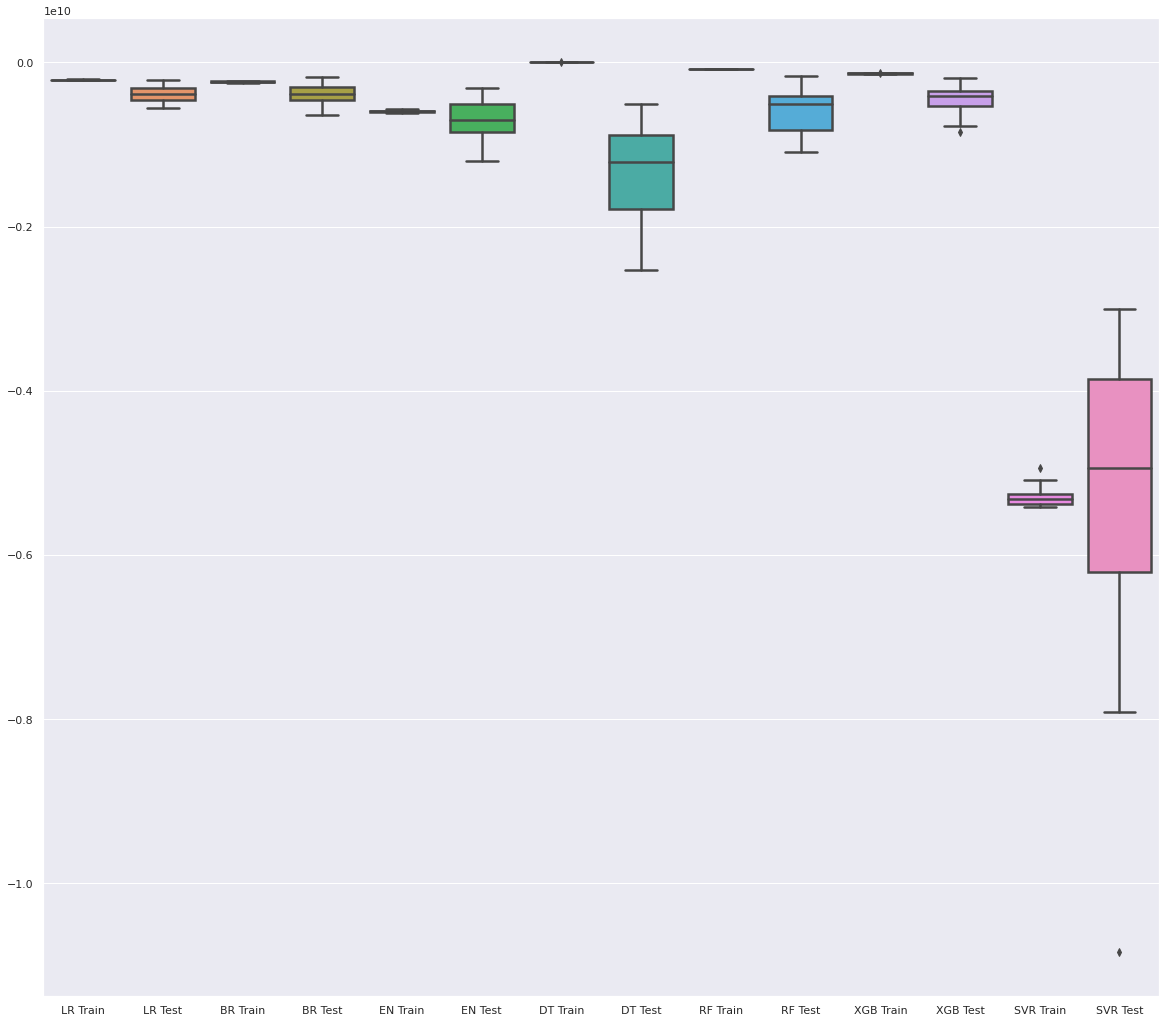

In [42]:
model_selection(X_train, Y_train, 'neg_mean_squared_error',register_model,folds)

In [43]:
#normalisasi data
norm = Normalizer()
X_norm = norm.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[17:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LR Train    -7.811508e+08
LR Test     -2.030672e+20
BR Train    -5.012137e+09
BR Test     -5.038195e+09
EN Train    -5.008719e+09
EN Test     -5.035307e+09
DT Train    -7.999798e+03
DT Test     -1.578853e+09
RF Train    -1.199352e+08
RF Test     -8.685926e+08
XGB Train   -1.849074e+08
XGB Test    -6.875198e+08
SVR Train   -5.289592e+09
SVR Test    -5.312849e+09
dtype: float64

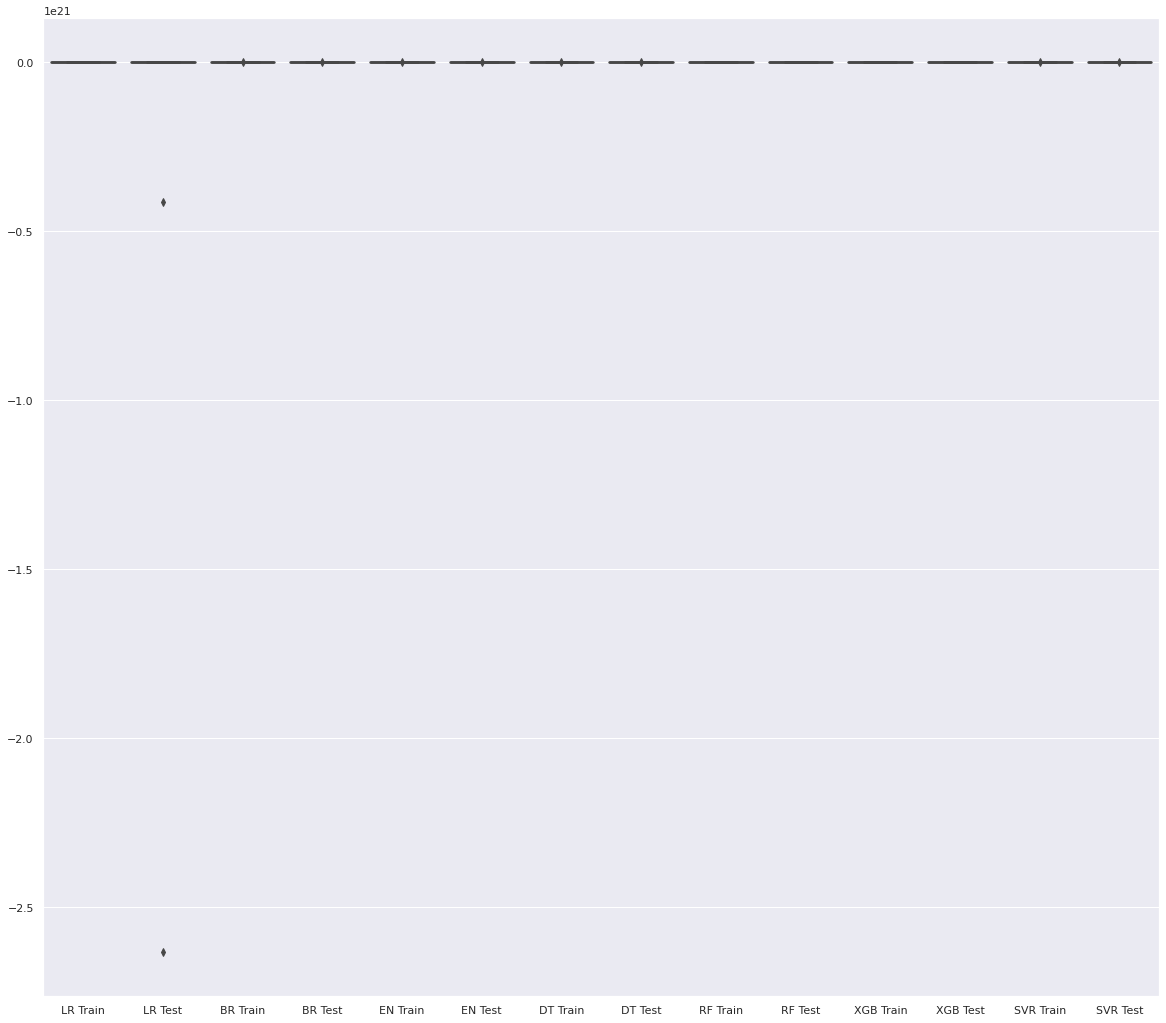

In [44]:
model_selection(X_norm, Y_train, 'neg_mean_squared_error',register_model,folds)

#Fit the Model

In [45]:
xgb.fit(X_norm,Y_train)

[17:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [59]:
for i in register_model:
  i[1].fit(X_norm,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[17:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


So far, XGB has the best result. Next step is hyperparameter tuning for XGB.

Linear Regression and Random Forest could be applied as support if algorithm stacking is to be implemented.

In [64]:
XGB_regressor = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=0)

In [65]:
XGB_regressor.fit(X_norm,Y_train)

XGBRegressor(verbosity=0)

#Load Test Data

In [52]:
test_url = 'https://raw.githubusercontent.com/mihoku/PJJ-Data-Analytics-Python/main/Hari%207/test_data.csv'
data_test = pd.read_csv(test_url)
test_index = data_test[['index']]

##process test data

In [53]:
X_test = data_test[columns]

In [54]:
X_test_norm = norm.fit_transform(X_test)

In [56]:
prediction_result = xgb.predict(X_test_norm)

In [57]:
result = test_index.copy()
result['SalePrice'] = prediction_result

##Export Results

In [58]:
result.to_csv('submission.csv',index=False)

In [63]:
for i in register_model:
  res = test_index.copy()
  pred = i[1].predict(X_test_norm)
  res['SalePrice'] = pred
  res.to_csv('submission '+i[0]+'.csv',index=False)

In [66]:
res_hyp = test_index.copy()
pred_hyp = XGB_regressor.predict(X_test_norm)
res_hyp['SalePrice'] = pred_hyp
res_hyp.to_csv('submission Tune XGB.csv',index=False)